In [1]:
import sqlite3
import numpy as np
import pandas as pd

In [2]:
#create database
conn = sqlite3.connect('trial.db')

In [3]:
#import dataset into jupyter
#df1 = pd.read_csv('/Users/dobaophuc/Documents/học data analyst/dataset/covid-death.csv')

In [4]:
#load the dataset into database and create a table
#df1.to_sql('death',conn)

In [5]:
pd.read_sql("""
    select *
    from death
    """, conn)

,index,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,...,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,death_percent_case,case_percent_population,death_percent_population
0,0,AFG,Asia,Afghanistan,2020-01-03,41128772,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AFG,Asia,Afghanistan,2020-01-04,41128772,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AFG,Asia,Afghanistan,2020-01-05,41128772,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AFG,Asia,Afghanistan,2020-01-06,41128772,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AFG,Asia,Afghanistan,2020-01-07,41128772,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297333,297333,ZWE,Africa,Zimbabwe,2023-03-17,16320539,264391.0,0.0,5.571,5672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.145308,1.619989,0.034754
297334,297334,ZWE,Africa,Zimbabwe,2023-03-18,16320539,264391.0,0.0,2.714,5672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.145308,1.619989,0.034754
297335,297335,ZWE,Africa,Zimbabwe,2023-03-19,16320539,264391.0,0.0,0.857,5672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.145308,1.619989,0.034754
297336,297336,ZWE,Africa,Zimbabwe,2023-03-20,16320539,264391.0,0.0,0.000,5672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.145308,1.619989,0.034754


<h2>Adding some calculated columns for my analysis purpose...</h2>

<p>- <strong>case_percent_population</strong>: The proportion of case numbers compared to a country's population.</p>
<p>- <strong>death_percent_case</strong>: The proportion of death cases compared to the total cases in a country.</p> 
<p>- <strong>death_percent_population</strong>: The proportion of death case numbers compared to a country's population.</p>

In [6]:
#pd.read_sql("""
#    alter table death
#    drop column case_percent""", conn)
#pd.read_sql("""
#    alter table death
#    drop column death_percent""", conn)
#pd.read_sql("""
#    alter table death
#    drop column death_percent_population""", conn)

In [7]:
#pd.read_sql("""
#    alter table death 
#    add death_percent_case as (total_deaths/total_cases*100)
#    """, conn)


In [8]:
pd.read_sql("""
    select location, date, total_cases, total_deaths, death_percent_case 
    from death 
    where total_cases>0""", conn)

,location,date,total_cases,total_deaths,death_percent_case
0,Afghanistan,2020-02-24,5.0,NaN,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN
...,...,...,...,...,...
261396,Zimbabwe,2023-03-17,264391.0,5672.0,2.145308
261397,Zimbabwe,2023-03-18,264391.0,5672.0,2.145308
261398,Zimbabwe,2023-03-19,264391.0,5672.0,2.145308
261399,Zimbabwe,2023-03-20,264391.0,5672.0,2.145308


In [9]:
#pd.read_sql("""
#                alter table death
#                add case_percent_population as (total_cases*100/population)
#                """,
#           conn)

In [10]:
#pd.read_sql("""
#                alter table death
#                add death_percent_population as (total_deaths*100/population)
#                """,
#           conn)

In [11]:
pd.read_sql("""
                select location,date,total_cases,total_deaths,death_percent_case,case_percent_population,death_percent_population
                from death 
                limit 10;""",
           conn)

,location,date,total_cases,total_deaths,death_percent_case,case_percent_population,death_percent_population
0,Afghanistan,2020-01-03,None,None,None,None,None
1,Afghanistan,2020-01-04,None,None,None,None,None
2,Afghanistan,2020-01-05,None,None,None,None,None
3,Afghanistan,2020-01-06,None,None,None,None,None
4,Afghanistan,2020-01-07,None,None,None,None,None
5,Afghanistan,2020-01-08,None,None,None,None,None
6,Afghanistan,2020-01-09,None,None,None,None,None
7,Afghanistan,2020-01-10,None,None,None,None,None
8,Afghanistan,2020-01-11,None,None,None,None,None
9,Afghanistan,2020-01-12,None,None,None,None,None


<h3>Visualizing material preparation</h3>

In [26]:
#!pip install Folium

In [27]:
import folium

In [28]:
import requests
import json 
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'
res = requests.get(URL)
world_geo = json.loads(res.text)

<h2>Infection rate analysis</h2>

<h3>#Which country has the highest infection rate compared to population?</h3>

In [12]:
pd.read_sql("""
                select location, continent, date, population, total_cases, max(case_percent_population)
                from death
                group by location
                order by max(case_percent_population) desc
                limit 10
                ;""",
           conn)

,location,continent,date,population,total_cases,max(case_percent_population)
0,Cyprus,Europe,2023-03-17,896007,653667.0,72.953336
1,San Marino,Europe,2023-03-19,33690,23747.0,70.486791
2,Austria,Europe,2023-03-21,8939617,6003506.0,67.156188
3,Faeroe Islands,Europe,2022-03-02,53117,34658.0,65.248414
4,Slovenia,Europe,2023-03-21,2119843,1336426.0,63.043631
5,Gibraltar,Europe,2023-03-10,32677,20462.0,62.618967
6,Brunei,Asia,2023-03-07,449002,280790.0,62.536470
7,Martinique,North America,2023-03-14,367512,229267.0,62.383541
8,Andorra,Europe,2023-03-16,79843,47908.0,60.002755
9,Jersey,Europe,2023-01-31,110796,66391.0,59.921838


<p>==> Most of the top 10 countries having the hightest infection rate are <strong>European</strong>.</p>

<h3>#Do total cases have a positive relationship with population, or climate and authority's attitude are a major influencer to the case total?</h3>

In [13]:
pd.read_sql("""
                select location, continent, date, population, max(total_cases), case_percent_population,death_percent_case, death_percent_population
                from death
                where continent is not null
                group by location
                order by max(total_cases) desc
                limit 10
                ;""",
           conn)

,location,continent,date,population,max(total_cases),case_percent_population,death_percent_case,death_percent_population
0,United States,North America,2023-03-18,338289856,102544598.0,30.312643,1.087303,0.329590
1,China,Asia,2023-03-20,1425887360,99229372.0,6.959131,0.121713,0.008470
2,India,Asia,2023-03-21,1417173120,44696984.0,3.153954,1.187570,0.037455
3,France,Europe,2023-03-21,67813000,38623552.0,56.955970,0.418656,0.238450
4,Germany,Europe,2023-03-21,83369840,38306781.0,45.948008,0.443269,0.203673
5,Brazil,South America,2023-03-12,215313504,37145514.0,17.251827,1.883495,0.324937
6,Japan,Asia,2023-03-20,123951696,33374303.0,26.925249,0.220262,0.059306
7,South Korea,Asia,2023-03-20,51815808,30702960.0,59.254041,0.111295,0.065947
8,Italy,Europe,2023-03-17,59037472,25651205.0,43.449023,0.735833,0.319712
9,United Kingdom,Europe,2023-03-17,67508936,24448729.0,36.215545,0.856470,0.310175


=> Top 3 countries with the most cases are also the <strong>top 3 most populated countries</strong>. Others in top 10, such as Brazil, Germany, Japan, also have a place in top 20 most populated countries.

=> So <strong>why France and Germany, for example, has such a high infection rate?</strong> The answer remains unknown.

=> Apart from India and Brazil, the rest are all <strong>countries with high income</strong>.

=> <strong>China</strong> had a high infection rate because this is the origin of the Pandemic. However, its <strong>percentage of death per total case and per population is comparatively low</strong> in the top 10 rank. For every 100.000 Chinese, there are only 8 Chinese died of Covid, the figure was 37 in the India although they have nearly the same population.

<h3>Total cases by Countries Visualization</h3>

In [29]:
world_map = folium.Map(location=[0, 0], zoom_start=2)
df_country = df1[df1['continent']!=None].groupby(['location'])['total_cases'].max().reset_index()
df_country = df_country.sort_values(by = 'total_cases').reset_index(drop=True)
df_country.dropna(inplace = True)
df_country = df_country.drop(index=[233,234,237,238,239,240,241,242,243])

In [45]:
df_country.replace('United States','United States of America', inplace = True)
df_country.replace('Russia','Russian Federation', inplace = True)
df_country.replace('Czechia','Czech Republic', inplace = True)
df_country.replace('Tanzania','United Republic of Tanzania', inplace = True)
df_country.replace('Democratic Republic of Congo','Democratic Republic of the Congo', inplace = True)

In [46]:
threshold_scale = np.linspace(df_country['total_cases'].min(),
                              df_country['total_cases'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df_country,
    columns=['location', 'total_cases'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total cases around the world',
    reset=True
)
world_map

/Users/dobaophuc/opt/anaconda3/lib/python3.9/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


<h3>#Let's see the total cases by region</h3>

In [14]:
#Now the total cases by region:
pd.read_sql("""
                select location, continent, date, population, max(total_cases), case_percent_population,death_percent_case, death_percent_population
                from death
                where continent is null
                group by location
                order by max(total_cases) desc
                limit 10
                ;""",
           conn)

,location,continent,date,population,max(total_cases),case_percent_population,death_percent_case,death_percent_population
0,World,None,2023-03-21,7975105024,761071062.0,9.543085,0.903945,0.086264
1,High income,None,2023-03-21,1250514600,417910867.0,33.419111,0.678945,0.226897
2,Asia,None,2023-03-21,4721383370,295265312.0,6.253788,0.550885,0.034451
3,Europe,None,2023-03-21,744807803,247480240.0,33.227396,0.820077,0.272490
4,Upper middle income,None,2023-03-21,2525921300,242747582.0,9.610259,1.092359,0.104979
5,European Union,None,2023-03-21,450146793,182927871.0,40.637382,0.666233,0.270740
6,North America,None,2023-03-21,600323657,123085673.0,20.503219,1.289946,0.264480
7,Lower middle income,None,2023-03-21,3432097300,96915509.0,2.823798,1.381409,0.039008
8,South America,None,2023-03-21,436816679,68106350.0,15.591518,1.984639,0.309435
9,Oceania,None,2023-03-20,45038860,14064260.0,31.226945,0.180358,0.056320


<p>=> COVID 19 seems to be a pandemic of <strong>the rich</strong> when income has a <strong>negative relationship</strong> with the total number of cases, although the high income countries's population is the least among the 3 groups.</p>

<p>=> Also, roughly <strong>1/3</strong> of <strong>European countries</strong> are infected to COVID, which is an extremely high rate.</p>

<h2>Fatality rate</h2>

<h3>#Which country has the most fatality cases by COVID?</h3>

In [15]:
pd.read_sql("""
                select location, continent, date, population, max(total_deaths), total_cases, death_percent_case, death_percent_population
                from death
                where continent is not null
                group by location
                order by max(total_deaths) desc
                limit 10
                ;""",
           conn)

,location,continent,date,population,max(total_deaths),total_cases,death_percent_case,death_percent_population
0,United States,North America,2023-03-18,338289856,1114970.0,102544598.0,1.087303,0.329590
1,Brazil,South America,2023-03-12,215313504,699634.0,37145514.0,1.883495,0.324937
2,India,Asia,2023-03-21,1417173120,530808.0,44696984.0,1.187570,0.037455
3,Russia,Europe,2023-03-21,144713312,396899.0,22525882.0,1.761969,0.274266
4,Mexico,North America,2023-03-20,127504120,333327.0,7511450.0,4.437585,0.261424
5,Peru,South America,2023-03-20,34049588,219648.0,4489377.0,4.892617,0.645083
6,United Kingdom,Europe,2023-03-16,67508936,209396.0,24448728.0,0.856470,0.310175
7,Italy,Europe,2023-03-17,59037472,188750.0,25651205.0,0.735833,0.319712
8,Germany,Europe,2023-03-21,83369840,169802.0,38306781.0,0.443269,0.203673
9,France,Europe,2023-03-21,67813000,161700.0,38623552.0,0.418656,0.238450


<p>=> <strong>China</strong> was not in this rank, while <strong>Russia</strong>, though not present in the top 10 highest total cases, ranked the fourth in the list. The rest are familiar countries in the previous table.</p>

<h3>Fatality cases by Country Visualization</h3>

In [62]:
df_country2 = df1[df1['continent']!=None].groupby(['location'])['total_deaths'].max().reset_index()
df_country2 = df_country2.sort_values(by = 'total_deaths').reset_index(drop=True)
df_country2.dropna(inplace = True)
df_country2.tail(10)

,location,total_deaths
227,United States,1114970.0
228,European Union,1218726.0
229,Lower middle income,1338800.0
230,South America,1351665.0
231,North America,1587739.0
232,Asia,1626572.0
233,Europe,2029529.0
234,Upper middle income,2651676.0
235,High income,2837386.0
236,World,6879664.0


In [63]:
df_country2 = df_country2.drop(index=[228,229,230,231,232,233,234,235,236])
df_country2.replace('United States','United States of America', inplace = True)
df_country2.replace('Russia','Russian Federation', inplace = True)
df_country2.replace('Czechia','Czech Republic', inplace = True)
df_country2.replace('Tanzania','United Republic of Tanzania', inplace = True)
df_country2.replace('Democratic Republic of Congo','Democratic Republic of the Congo', inplace = True)

In [66]:
world_map2 = folium.Map(location=[0, 0], zoom_start=2)
threshold_scale = np.linspace(df_country2['total_deaths'].min(),
                              df_country2['total_deaths'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map2 = folium.Map(location=[0, 0], zoom_start=2)
world_map2.choropleth(
    geo_data=world_geo,
    data=df_country2,
    columns=['location','total_deaths'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='Reds', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total fatal cases around the world',
    reset=True
)
world_map2

<h3>#Which region/ group has the most fatality cases by COVID?</h3>

In [16]:
pd.read_sql("""
                select location, continent, date, population, max(total_deaths), total_cases, death_percent_case, death_percent_population
                from death
                where continent is null
                group by location
                order by max(total_deaths) desc
                limit 10
                ;""",
           conn)

,location,continent,date,population,max(total_deaths),total_cases,death_percent_case,death_percent_population
0,World,None,2023-03-21,7975105024,6879664.0,761071062.0,0.903945,0.086264
1,High income,None,2023-03-21,1250514600,2837386.0,417910867.0,0.678945,0.226897
2,Upper middle income,None,2023-03-21,2525921300,2651676.0,242747582.0,1.092359,0.104979
3,Europe,None,2023-03-21,744807803,2029529.0,247480240.0,0.820077,0.272490
4,Asia,None,2023-03-21,4721383370,1626572.0,295265312.0,0.550885,0.034451
5,North America,None,2023-03-20,600323657,1587739.0,123085381.0,1.289949,0.264480
6,South America,None,2023-03-21,436816679,1351665.0,68106350.0,1.984639,0.309435
7,Lower middle income,None,2023-03-21,3432097300,1338800.0,96915509.0,1.381409,0.039008
8,European Union,None,2023-03-21,450146793,1218726.0,182927871.0,0.666233,0.270740
9,Africa,None,2023-03-21,1426736614,258788.0,13063768.0,1.980960,0.018138


<p>=> The COVID-19 pandemic was totally a nightmare for the <strong>rich countries and Europe</strong>. However, while <strong>Africa and Low middle income group</strong> recorded a relatively low number of fatal cases, their <strong>death percentage over total cases</strong> were high. This may reflect the quality of medical and health care competency and political stability of the region in face of the COVID outbreak.</p>

<h3>#Is it true that countries with the highest death percentage over total cases belong to lower middle income countries?</h3>

In [17]:
pd.read_sql("""
                select location, continent, date, population, total_deaths, total_cases, max(death_percent_case)
                from death
                where date > 2023/01/01
                group by location
                order by max(death_percent_case) desc
                limit 20""",
           conn)

,location,continent,date,population,total_deaths,total_cases,max(death_percent_case)
0,Yemen,Asia,2023-01-01,33696612,2159.0,11945.0,18.074508
1,Sudan,Africa,2023-03-13,46874200,5023.0,63853.0,7.866506
2,Syria,Asia,2023-01-01,22125242,3163.0,57423.0,5.508246
3,Somalia,Africa,2023-01-01,17597508,1361.0,27310.0,4.983523
4,Peru,South America,2023-01-01,34049588,218201.0,4454236.0,4.898730
5,Egypt,Africa,2023-03-21,110990096,24819.0,515852.0,4.811264
6,Mexico,North America,2023-01-01,127504120,331474.0,7271625.0,4.558458
7,Bosnia and Herzegovina,Europe,2023-03-21,3233530,16296.0,401973.0,4.054004
8,Afghanistan,Asia,2023-01-01,41128772,7849.0,207579.0,3.781211
9,Liberia,Africa,2023-01-01,5302690,294.0,8055.0,3.649907


<p>=> Doing a little reserach about Yemen, according to BMJ - an NPO online journal in medical and healthcare - in 2020 (https://www.bmj.com/content/370/bmj.m2997): "Around 18% of the country’s 333 districts already have no doctors, and many of those who remain have been unpaid for nearly two years. MedGlobal said that there were now 10 healthcare workers for every 10 000 people, less than half the World Health Organization benchmark.Yemen recorded its first covid-19 case on 10 April. Official figures put the number of confirmed cases at over 1600, with nearly 500 deaths—a mortality rate of 27%, which is one of the highest in the world and five times the global average."</p>

<p>=> According to Médecins Sans Frontières (MSF) - an international medical humanitarian organisation - in 2023 (https://www.msf.org/yemen-abs-hospital-overwhelmed-medical-needs-surge): “Supporting Abs hospital has become one of MSF’s biggest humanitarian responses worldwide, but today we have reached the limit of our capacity to respond, in terms of space, human resources and supply. The increased demand on Abs hospital’s services is due to a number of factors, including the protracted conflict in Yemen. To make matters worse, the poor living conditions in camps for displaced people in Abs district, including a lack of clean water and sanitation, lead to disease outbreaks. The situation was exacerbated in 2022 when funding cuts caused several health providers to stop working.</p>

<p>=> The situation in top 5 (Sudan, Syria, Somalia) remained the same with ongoing conflicts, wars, and poor living condition.</p>

<p>=> In top 20 countries having the most death percentage over total cases, <strong>African</strong> countries took <strong>9</strong>, while the other continent took from 3-4 candidates.</p>

In [18]:
pd.read_sql("""
                select location, continent, date, population, total_deaths, total_cases, max(death_percent_case)
                from death
                where date > 2023/01/01 and continent = 'Africa'
                group by location
                order by max(death_percent_case) desc
                limit 10""",
           conn)

,location,continent,date,population,total_deaths,total_cases,max(death_percent_case)
0,Sudan,Africa,2023-03-13,46874200,5023.0,63853.0,7.866506
1,Somalia,Africa,2023-01-01,17597508,1361.0,27310.0,4.983523
2,Egypt,Africa,2023-03-21,110990096,24819.0,515852.0,4.811264
3,Liberia,Africa,2023-01-01,5302690,294.0,8055.0,3.649907
4,Niger,Africa,2023-01-01,26207982,315.0,9504.0,3.314394
5,Malawi,Africa,2023-01-01,20405318,2685.0,88211.0,3.043838
6,Gambia,Africa,2023-01-01,2705995,372.0,12586.0,2.955665
7,Tunisia,Africa,2023-01-01,12356116,29284.0,1147571.0,2.551825
8,Algeria,Africa,2023-01-01,44903228,6881.0,271217.0,2.537083
9,Chad,Africa,2023-01-01,17723312,194.0,7650.0,2.535948


<h3>Visualization of death percentage peak over total cases at the first year of 2020 and now - 2023</h3>

In [93]:
df_country4 = df1[df1['date']>'2020-06-01']
df_country4['death_percent_case']=df_country4['total_deaths']/df_country4['total_cases']*100
df_country4 = df_country4[df_country4['continent']!=None].groupby(['location'])['death_percent_case'].max().reset_index()
df_country4 = df_country4.sort_values(by = 'death_percent_case').reset_index(drop=True)
df_country4.dropna(inplace = True)
df_country4

/var/folders/zl/2tq_gym54j93bt895yh1qct00000gn/T/ipykernel_711/2020616615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country4['death_percent_case']=df_country4['total_deaths']/df_country4['total_cases']*100


,location,death_percent_case
0,Nauru,0.028003
1,Cook Islands,0.028769
2,Saint Pierre and Miquelon,0.120773
3,Tonga,0.128520
4,Bhutan,0.129702
...,...,...
232,Mexico,16.639521
233,France,19.274351
234,Sint Maarten (Dutch part),19.480519
235,Yemen,29.198842


<h3>In 2020</h3>

In [94]:
df_country4.replace('United States','United States of America', inplace = True)
df_country4.replace('Russia','Russian Federation', inplace = True)
df_country4.replace('Czechia','Czech Republic', inplace = True)
df_country4.replace('Tanzania','United Republic of Tanzania', inplace = True)
df_country4.replace('Democratic Republic of Congo','Democratic Republic of the Congo', inplace = True)

threshold_scale = np.linspace(df_country4['death_percent_case'].min(),
                              df_country4['death_percent_case'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map4 = folium.Map(location=[0, 0], zoom_start=2)
world_map4.choropleth(
    geo_data=world_geo,
    data=df_country4,
    columns=['location', 'death_percent_case'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='Reds', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Death percentage over total cases',
    reset=True
)
world_map4

/Users/dobaophuc/opt/anaconda3/lib/python3.9/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [95]:
df_country4 = df1[df1['date']>'2023-01-01']
df_country4['death_percent_case']=df_country4['total_deaths']/df_country4['total_cases']*100
df_country4 = df_country4[df_country4['continent']!=None].groupby(['location'])['death_percent_case'].max().reset_index()
df_country4 = df_country4.sort_values(by = 'death_percent_case').reset_index(drop=True)
df_country4.dropna(inplace = True)
df_country4

/var/folders/zl/2tq_gym54j93bt895yh1qct00000gn/T/ipykernel_711/4171441371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country4['death_percent_case']=df_country4['total_deaths']/df_country4['total_cases']*100


,location,death_percent_case
0,Nauru,0.021640
1,Burundi,0.028757
2,Cook Islands,0.028769
3,Bhutan,0.033580
4,Brunei,0.054774
...,...,...
232,Peru,4.894583
233,Somalia,4.983523
234,Syria,5.508246
235,Sudan,7.866506


<h3>And now 2023</h3>

In [96]:
df_country4.replace('United States','United States of America', inplace = True)
df_country4.replace('Russia','Russian Federation', inplace = True)
df_country4.replace('Czechia','Czech Republic', inplace = True)
df_country4.replace('Tanzania','United Republic of Tanzania', inplace = True)
df_country4.replace('Democratic Republic of Congo','Democratic Republic of the Congo', inplace = True)

threshold_scale = np.linspace(df_country4['death_percent_case'].min(),
                              df_country4['death_percent_case'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map4 = folium.Map(location=[0, 0], zoom_start=2)
world_map4.choropleth(
    geo_data=world_geo,
    data=df_country4,
    columns=['location', 'death_percent_case'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='Reds', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Death percentage over total cases around the world',
    reset=True
)
world_map4

/Users/dobaophuc/opt/anaconda3/lib/python3.9/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


<h3>Bonus: Death percentage per population map up to 2023</h3>

In [98]:
df_country3 = df1
df_country3['death_percent_population(*10)']=df_country3['total_deaths']/df_country3['population']*1000
df_country3 = df_country3[df_country3['continent']!=None].groupby(['location'])['death_percent_population(*10)'].max().reset_index()
df_country3 = df_country3.sort_values(by = 'death_percent_population(*10)').reset_index(drop=True)
df_country3.dropna(inplace = True)
df_country3

,location,death_percent_population(*10)
0,Burundi,0.001164
1,Chad,0.010946
2,Niger,0.012019
3,Benin,0.012207
4,Tajikistan,0.012559
...,...,...
232,North Macedonia,4.616437
233,Hungary,4.884972
234,Bosnia and Herzegovina,5.039693
235,Bulgaria,5.638492


In [99]:
df_country3.replace('United States','United States of America', inplace = True)
df_country3.replace('Russia','Russian Federation', inplace = True)
df_country3.replace('Czechia','Czech Republic', inplace = True)
df_country3.replace('Tanzania','United Republic of Tanzania', inplace = True)
df_country3.replace('Democratic Republic of Congo','Democratic Republic of the Congo', inplace = True)

threshold_scale = np.linspace(df_country3['death_percent_population(*10)'].min(),
                              df_country3['death_percent_population(*10)'].max(),
                              5, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map3 = folium.Map(location=[0, 0], zoom_start=2)
world_map3.choropleth(
    geo_data=world_geo,
    data=df_country3,
    columns=['location', 'death_percent_population(*10)'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='Reds', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Death percentage over population around the world (the figure is 10 times the real data)',
    reset=True
)
world_map3

/Users/dobaophuc/opt/anaconda3/lib/python3.9/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


<h2>Peak period of COVID around the world</h2>

In [19]:
pd.read_sql("""
                select location, date, population, new_cases, total_cases
                from death
                where location = 'World'
                order by new_cases desc
                limit 20""",
           conn)

,location,date,population,new_cases,total_cases
0,World,2022-12-23,7975105024,7946912.0,692718244.0
1,World,2022-12-22,7975105024,6947438.0,684771332.0
2,World,2022-12-24,7975105024,6830654.0,699548898.0
3,World,2022-12-21,7975105024,6463317.0,677823894.0
4,World,2022-12-25,7975105024,6113164.0,705662062.0
5,World,2022-12-20,7975105024,5616035.0,671360577.0
6,World,2022-12-26,7975105024,4918375.0,710580437.0
7,World,2022-12-28,7975105024,4892053.0,720354642.0
8,World,2022-12-27,7975105024,4882152.0,715462589.0
9,World,2022-12-19,7975105024,4348305.0,665744542.0


<p>=> It is recorded that the <strong>2 biggest waves</strong> of COVID took place <strong>at the beginning and at the end of 2022</strong> when the daily new cases reached their peaks. However, I'm not sure if there are still other significant period. So let's do a quick visualization...</p>

<h3>Visualization of peak period by continents</h3>

In [20]:
import matplotlib.pyplot as plt

df1 = pd.read_csv('/Users/dobaophuc/Documents/học data analyst/dataset/covid-death.csv')
dfworld = df1[df1['location']=='World']
dfworld.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
292635,OWID_WRL,NaN,World,2020-01-03,7975105024,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292636,OWID_WRL,NaN,World,2020-01-04,7975105024,3.0,3.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292637,OWID_WRL,NaN,World,2020-01-05,7975105024,3.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292638,OWID_WRL,NaN,World,2020-01-06,7975105024,6.0,3.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292639,OWID_WRL,NaN,World,2020-01-07,7975105024,6.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


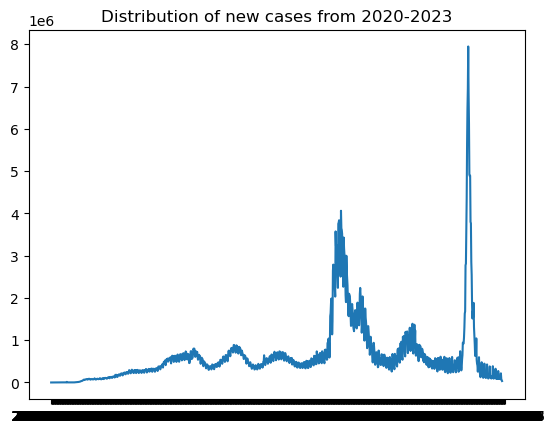

In [101]:
plt.plot(dfworld['date'],dfworld['new_cases'])
plt.title('Distribution of new cases from 2020-2023')
plt.show()

<p>It can be seen that there are 2 major peaks demonstrated in the graph and the other peaks are not considerable.</p>

In [22]:
dfAsia = df1[df1['location']=='Asia']
dfEuro = df1[df1['location']=='Europe']
dfAfri = df1[df1['location']=='Africa']
dfNAme = df1[df1['location']=='North America']
dfSAme = df1[df1['location']=='South America']
dfOce = df1[df1['location']=='Oceania']

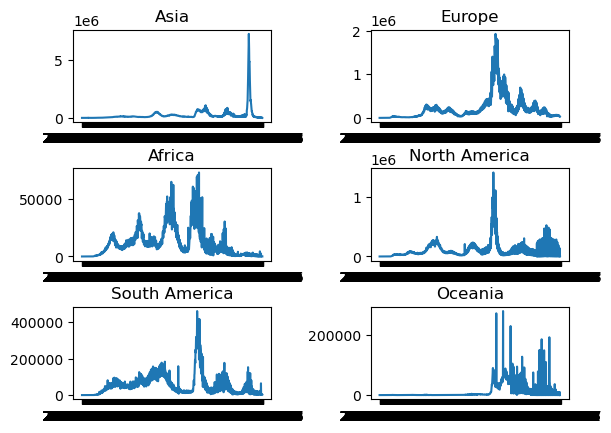

In [23]:
figure, axis = plt.subplots(3, 2)
axis[0, 0].plot(dfAsia['date'],dfAsia['new_cases'])
axis[0, 0].set_title("Asia")
axis[0, 1].plot(dfEuro['date'],dfEuro['new_cases'])
axis[0, 1].set_title("Europe")
axis[1, 0].plot(dfAfri['date'],dfAfri['new_cases'])
axis[1, 0].set_title("Africa")
axis[1, 1].plot(dfNAme['date'],dfNAme['new_cases'])
axis[1, 1].set_title("North America")
axis[2, 0].plot(dfSAme['date'],dfSAme['new_cases'])
axis[2, 0].set_title("South America")
axis[2, 1].plot(dfOce['date'],dfOce['new_cases'])
axis[2, 1].set_title("Oceania")

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
plt.show()

<p>While Europe, America, and Oceania witnessed the pandemic peak at relatively the same period, <strong>Africa and Asia</strong> recorded the peaks quite differently. Let's go into detail.</p>

<h3>#Looking for the peak period of COVID in Asia</h3>

In [24]:
pd.read_sql("""
                select location, date, new_cases
                from death
                where location = 'Asia'
                order by new_cases desc
                limit 20""",
           conn)
#The peak is at the end of 2022

,location,date,new_cases
0,Asia,2022-12-23,7213891.0
1,Asia,2022-12-22,6701558.0
2,Asia,2022-12-24,6579515.0
3,Asia,2022-12-21,6207549.0
4,Asia,2022-12-25,5881921.0
5,Asia,2022-12-20,5385913.0
6,Asia,2022-12-27,4840822.0
7,Asia,2022-12-26,4799136.0
8,Asia,2022-12-28,4665996.0
9,Asia,2022-12-19,4172792.0


<h3>#Looking for the peak period of COVID in Africa</h3>

In [25]:
pd.read_sql("""
                select location, date, new_cases
                from death
                where location = 'Africa'
                order by new_cases desc
                limit 20""",
           conn)

,location,date,new_cases
0,Africa,2022-02-02,72463.0
1,Africa,2022-01-25,70333.0
2,Africa,2022-01-19,68760.0
3,Africa,2021-08-06,64412.0
4,Africa,2021-08-19,61771.0
5,Africa,2021-12-24,60268.0
6,Africa,2021-12-31,58974.0
7,Africa,2022-01-06,56090.0
8,Africa,2022-01-12,56006.0
9,Africa,2022-01-05,54753.0


<p>=> Africa actually got 3 peaks: at the start of 2022, August 2021, and at the end of 2021.</p>

In [100]:
conn.close()

<h2>Thanks for watching!</h2>